In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import psycopg2 as pg

In [4]:
conn = pg.connect("host=localhost dbname=poe user=postgres")

In [5]:
df = pd.read_sql_query('''SELECT * FROM offers LIMIT 1000000;''', conn)

In [6]:
df.sample(10)

,id,sell,buy,conversion_rate,stock,league,account_name,category,public,stash_type,created_at,change_id
61155,1152460,The Beast,chaos,1.0,1,Harvest,LifeoO,cards,True,PremiumStash,2020-06-21 11:14:31.317246,733162196-747145627-712535181-806587921-769378725
501698,1592999,Silver Oil,chaos,35.0,10,Standard,Toxic319,currency,True,PremiumStash,2020-06-21 15:59:45.138831,733473315-747452763-712840660-806928589-769700424
343426,1434735,Screaming Essence of Woe,chaos,2.0,1,Harvest,Zoldberg69,currency,True,PremiumStash,2020-06-21 14:24:53.268628,733362048-747346468-712730875-806807752-769587388
131865,1223170,Vanity,chaos,2.5,2,Harvest,siiq,cards,True,PremiumStash,2020-06-21 12:06:51.120917,733214969-747203611-712582646-806644943-769431551
434179,1525478,The Bones,chaos,4.0,1,Harvest,Pivo_na_Polu,cards,True,PremiumStash,2020-06-21 15:19:57.247684,733427820-747407460-712793977-806875479-769653402
711987,1803299,Orb of Transmutation,fusing,6.0,97,Harvest,Gott50,currency,True,CurrencyStash,2020-06-21 18:06:31.225573,733614153-747597785-712982054-807087998-769854828
183179,1274478,Doedre's Madness,alch,1.0,1,Harvest,Arthis667,cards,True,PremiumStash,2020-06-21 12:42:34.881542,733251397-747238301-712619774-806684866-769469290
150673,1241981,Vanity,chaos,2.0,1,Harvest,Frizick,cards,True,QuadStash,2020-06-21 12:20:16.566036,733229370-747216655-712596599-806659730-769445128
366716,1458009,Humility,chaos,2.0,1,Harvest,dhksgml4192,cards,True,PremiumStash,2020-06-21 14:38:32.867921,733378111-747361464-712746020-806824733-769603822
52670,1143974,Vivid Parasite Grain,chaos,1.0,1,Harvest,ArtuR4iK_NEO,currency,True,PremiumStash,2020-06-21 11:08:03.716123,733156265-747138745-712529449-806581180-769372272


In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,id,sell,buy,conversion_rate,stock,league,account_name,category,public,stash_type,created_at,change_id
0,81815,Whispering Essence of Greed,chaos,1.0,1,Harvest,huyquy94,currency,True,PremiumStash,2020-06-20 16:08:52.009688,732200120-746195321-711619021-805502144-768316810
1,81816,Muttering Essence of Sorrow,chaos,1.0,1,Harvest,huyquy94,currency,True,PremiumStash,2020-06-20 16:08:52.009688,732200120-746195321-711619021-805502144-768316810
2,81817,Divine Orb,chaos,3.0,1,Harvest,Kaskelothvalen,currency,True,CurrencyStash,2020-06-20 16:08:52.009688,732200120-746195321-711619021-805502144-768316810



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   id               1000000 non-null  int64         
 1   sell             1000000 non-null  object        
 2   buy              1000000 non-null  object        
 3   conversion_rate  999962 non-null   float64       
 4   stock            1000000 non-null  int64         
 5   league           1000000 non-null  object        
 6   account_name     1000000 non-null  object        
 7   category         1000000 non-null  object        
 8   public           1000000 non-null  bool          
 9   stash_type       1000000 non-null  object        
 10  created_at       1000000 non-null  datetime64[ns]
 11  change_id        1000000 non-null  object        
dtypes: bool(1), datetime64[ns](1),

,id,sell,buy,conversion_rate,stock,league,account_name,category,public,stash_type,created_at,change_id
29208,111029,Gemcutter's Prism,chaos,NaN,1,Harvest,forlulzxd,currency,True,PremiumStash,2020-06-20 16:44:20.937519,732229758-746227455-711647378-805533792-768347835
29210,111031,Chaos Orb,alch,NaN,1,Harvest,forlulzxd,currency,True,PremiumStash,2020-06-20 16:44:20.937519,732229758-746227455-711647378-805533792-768347835
67318,149146,Gemcutter's Prism,chaos,NaN,1,Harvest,forlulzxd,currency,True,PremiumStash,2020-06-20 17:29:20.250593,732267424-746265414-711689325-805576336-768391855


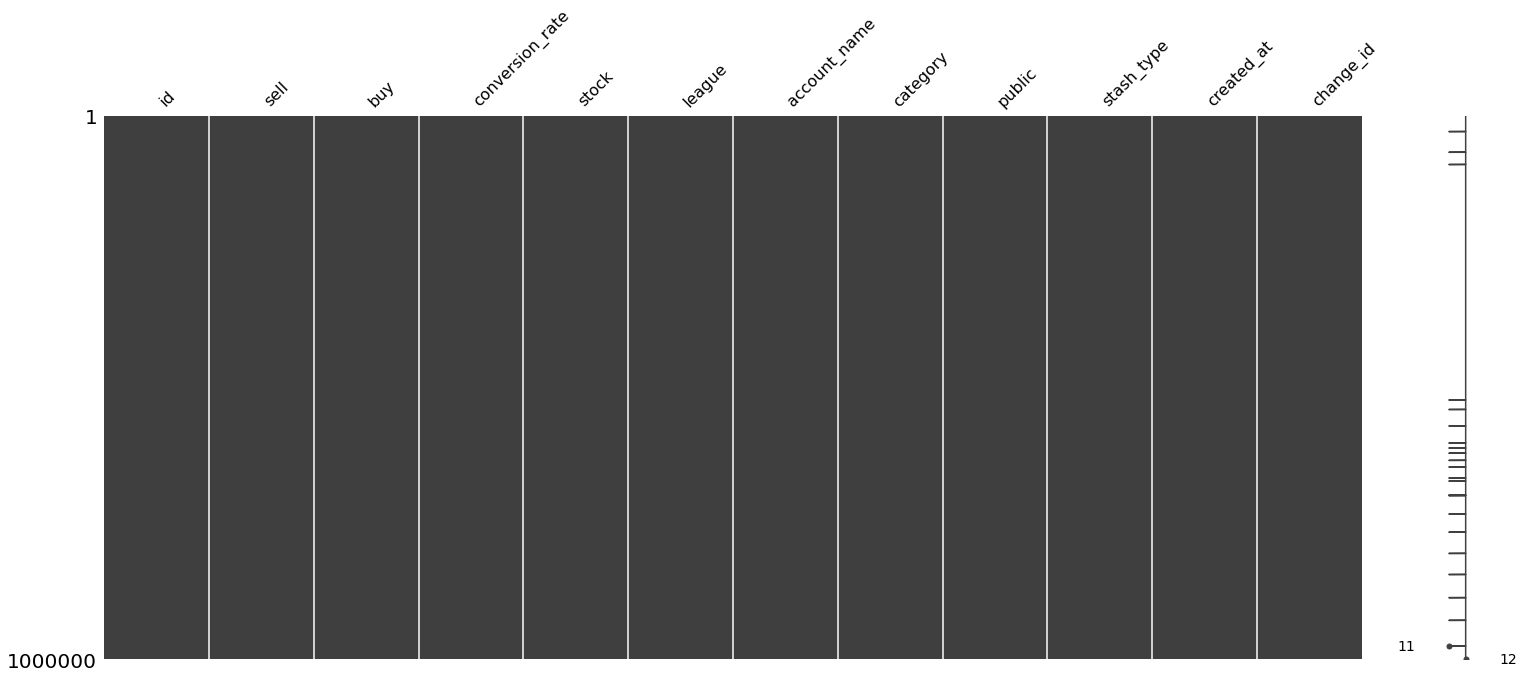


No duplicated entries found

To check: 
Unique count of non-numeric data

sell              722
buy               586
league              7
account_name    42192
category            4
stash_type          8
change_id       32079
dtype: int64
Top 5 unique values of sell
              sell  Count
0         Humility  64375
1        Chaos Orb  39868
2           Vanity  24940
3  Imperial Legacy  16371
4    Chromatic Orb  12834
 
Top 5 unique values of buy
         buy   Count
0      chaos  860723
1       alch   33641
2        exa   27766
3    exalted   20768
4  jewellers    4194
 
Top 5 unique values of league
                                 league   Count
0                               Harvest  793650
1                              Standard  174462
2                      Hardcore Harvest   30785
3  Wreaclast Gardening Society (PL9406)     990
4                              Hardcore      59
 
Top 5 unique values of account_name
    account_name  Count
0      wesleygjr  13480
1        Infa

,count,mean,std,min,25%,50%,75%,max
id,1000000.0,581828.947980,288676.187449,81815.0,331829.75,581829.5,831829.25,1081829.0
conversion_rate,999962.0,1953.817405,427646.557175,0.0,1.00,1.0,3.00,100000000.0
stock,1000000.0,94.211843,996.639759,1.0,1.00,1.0,5.00,50000.0


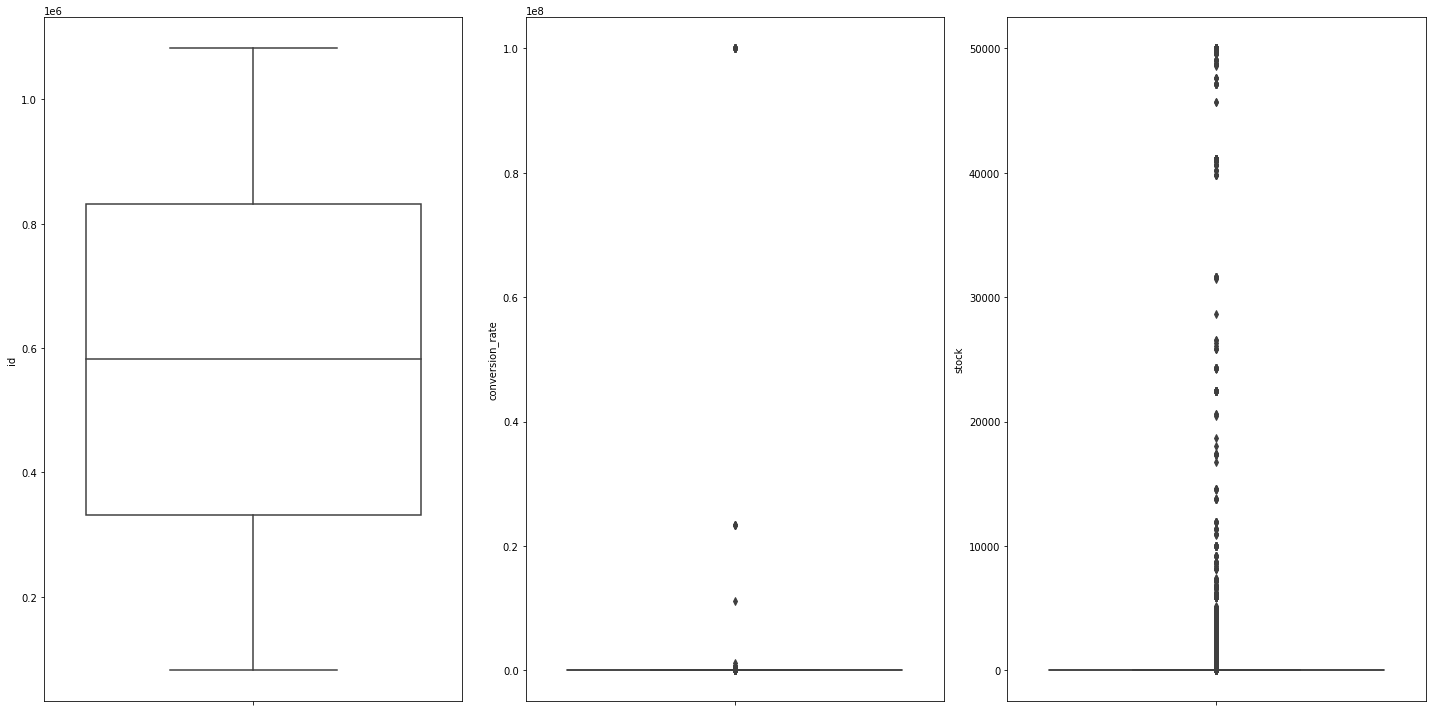


To check pairwise joint distribution of numeric data


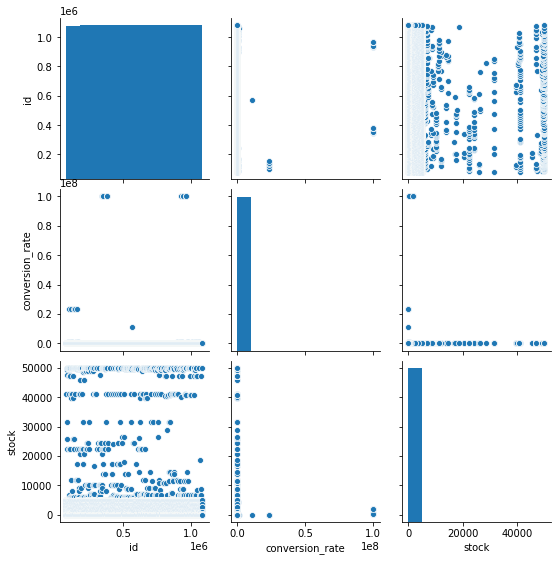


To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


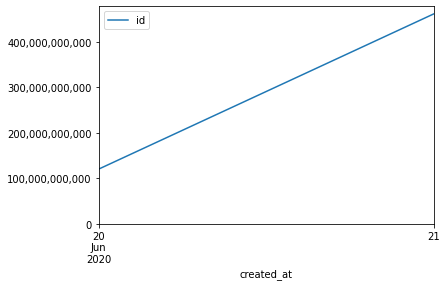

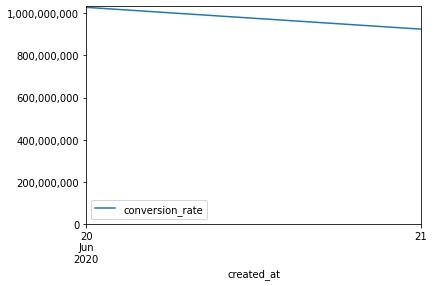

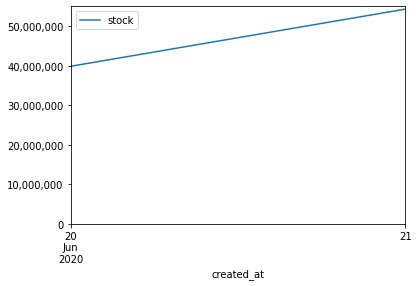

Plotting monthly data


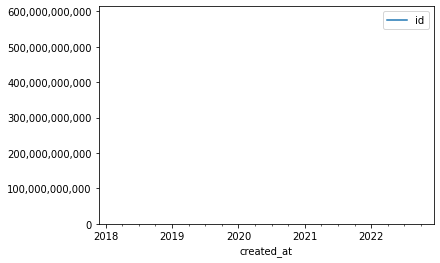

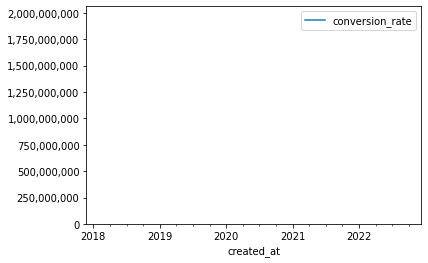

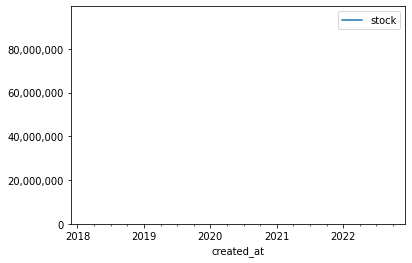

Plotting yearly data


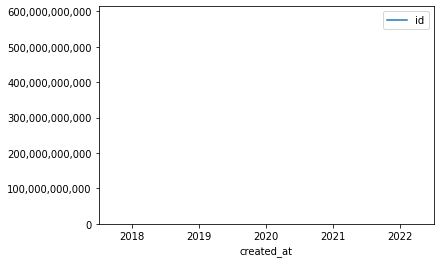

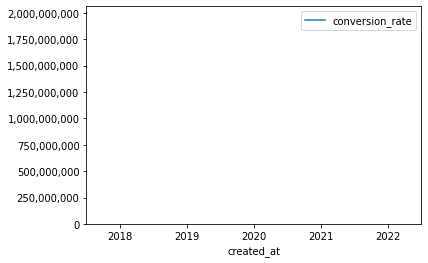

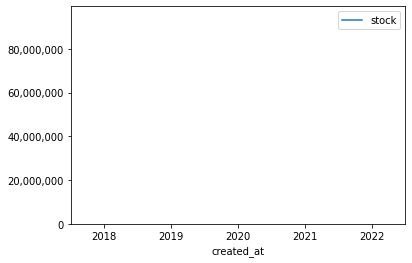

In [71]:
eda(df)

# Stash Type Usage

In [73]:
print("Unique stash types: {}".format(df["stash_type"].unique()))

Unique stash types: ['PremiumStash' 'CurrencyStash' 'DivinationCardStash' 'QuadStash'
 'FragmentStash' 'EssenceStash' 'DelveStash' 'NormalStash']


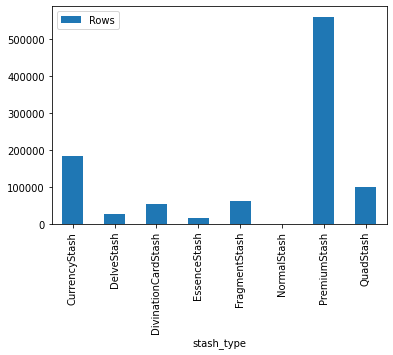

In [76]:
df.groupby("stash_type").count().plot.bar(y="id", label="Rows")

# Offer/Edge counts

### Top 10 Most Seen Edges

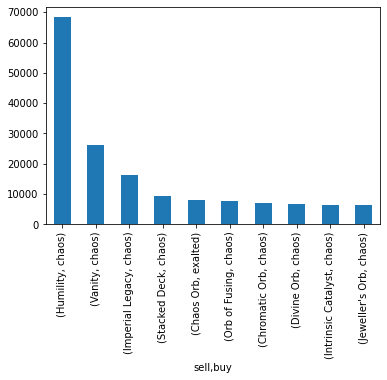

In [7]:
df.groupby(["sell", "buy"]).count().sort_values(by="id", ascending=False).head(10)["id"].plot.bar()

In [12]:
df.groupby(["sell", "buy"]).count().sort_values(by="id", ascending=False).describe()

,id,conversion_rate,stock,league,account_name,category,public,stash_type,created_at,change_id
count,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000
mean,223.813787,223.809311,223.813787,223.813787,223.813787,223.813787,223.813787,223.813787,223.813787,223.813787
std,1301.009739,1301.008295,1301.009739,1301.009739,1301.009739,1301.009739,1301.009739,1301.009739,1301.009739,1301.009739
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
75%,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
max,68316.000000,68316.000000,68316.000000,68316.000000,68316.000000,68316.000000,68316.000000,68316.000000,68316.000000,68316.000000


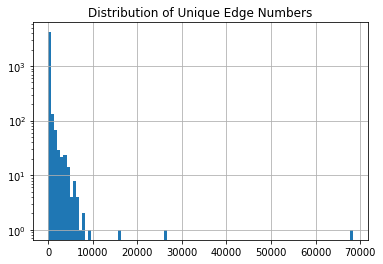

In [15]:
fig, ax = plt.subplots()
ax.set_yscale('log', basey=10)
df.groupby(["sell", "buy"]).count().sort_values(by="id", ascending=False).hist("id", ax=ax, bins=100)
plt.title("Distribution of Unique Edge Numbers")
plt.show()

# Sell Item Category Distribution

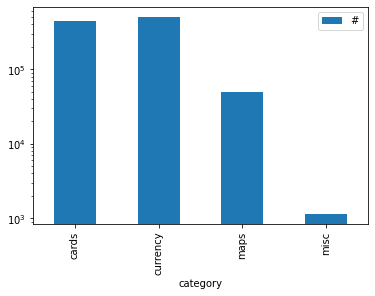

In [32]:
fig, ax = plt.subplots()
ax.set_yscale('log', basey=10)
df.groupby("category").count().plot.bar(ax=ax, y="id", label="#")
plt.show()